# Orientation

## Rotation

The world is full of animated agents, e.g. animals, aircraft, and robots. They move in the world avoiding predators, foraring and transporting back suplies, or looking for the perfect (or a suitable) mate. As observer of curiosities and strangeness of the world, we wonder where such agents look at, we wonder of their orientation. In geometry the orientation ( also: angular position, or attitude ) of an object is part of the description of how it is placed in the space it is in. Namely, it is the imaginary rotation that is needed to move the object from a reference placement to its current placement. 

To introduce the different concept related to the orientation of an agent, we will first work in a imaginary world composed of only two dimensions. The position of an agent in such world can be express as a function of two variables. Your screen is indeed a two dimentional space. The position of the mouse is express in term of pixel along the height and the length of your monitor. We could for example place the mouse at the position $(100,200)$. 
Wait, where should I start counting? Where is the position $(0,0)$? We need to define an origin, and the direction in which we count, e.g. from left to right and from bottom to top for the first and second variable respectivly. Without knowing we are defining a reference frame. A reference frame is composed of unit vectors, i.e. the direction in which we have to count and the unit used (here the unit is the pixel), and an origin (here the bottom left corner of the monitor).

The reference frame allows to position an agent in the world, but what about its orientation. The orientation of an agent requires another frame, one link to the agent itself. We need an origin, e.g. the center of mass, and two unit vectors (because we are in a 2D space, remember). One unit vector can be chosen along the long axis of the body, and the second one orthogonal to first one. The orthogonality will ease later the formalism. We can then place the agent in its resting position, i.e. at null orientation. When the agent will move its orientation will change, i.e. the imaginary rotation that is needed to move the reference frame at the resting position to the reference attached to the agent.

A rotation is a circular movement of an object around a center (or point) of rotation. In linear algebra the rotation of an angle $\alpha$ is defined by the matrix:

$$
   R =
   \begin{bmatrix}
   \cos \alpha & -\sin \alpha \\
   \sin \alpha & \cos \alpha \\
   \end{bmatrix}
$$

A vector $v_0$ can be rotated by an angle $\alpha$ by aplying the matrix $R$ to $v_0$, i.e. $v=Rv_0$

We will say that the agent is looking in the direction $\alpha$ when the frame link to the agent is the rotation by the angle $\alpha$ of the frame at the resting position, i.e. when

$$F_a=RF_0$$

here $F_a$ is the actual frame of the agent, $F_0$ is the frame at the resting position, and $R$ the imaginary rotation.


## Finding the orientation of an agent (2D)

Usualy we do not know the imaginary rotation made by the agent. To find it we need to invert the linar system introduced above. 

$$R=F_a(F_0)^{-1}$$

Once we have the orientation matrix we can find the angle $\alpha$ by using combination of elements of the matrix. For the present case we can get $\alpha$ by using the first column of the matrix.

## Reference frame in the real world (3D)

The real world do not have only two dimensions but three. The reference frames will have then three unit vectors. The first unit vector can still be choosen along the longitudinal axis of the agent. But how do we define the two other one. We can no longer determined the 2nd vector by using the 1st vector and orthogonality, because the 1st vector has an infinite amount of unit vectors. We need to introduce a convention. Scientists and ingenieurs have converged to a convention for aircraft. The first vector is along the longitidunal axis, the 2nd from left to right when seated in the aircraft, and the 3rd and last one pointing downward. The last vector is used to measure height, and it makes sens for an aircraft to measure height positivly downward. 

Once the reference frame has been introduce we need to have a look at the orientation matrix. This time it will be a 3x3 matrix, i.e. composed of 9 elements. 

A rotation in a three dimentional is made around a line, i.e. an axis or a vector. We have already defined three vectors, and you know what, the orientation can be defined by three rotations. 

**Note** The frame of the agent can be computed from three none colinear points. One will be the origin, the 1st axis can go from the origin an between the two other points. The second axis is orthogonal to the plane formed by the three points. The last vector is the cross product of the two other ones. This process assumes that the distance between any two given points of a rigid body remains constant in time regardless of external forces exerted on it, i.e. the points are placed on a rigid body

**Note** The set of vectors is call in linear algebra, a basis, if the vectors are linearly independent and every vector in the vector space is a linear combination of this set. In physics, it is called a frame of reference, i.e. it consits of an abstract coordinate system and the set of physical reference points that uniquely fix (locate and orient) the coordinate system and standardize measurements.


## From reference points to an orientation matrix

In geometry the orientation ( also: angular position, or attitude ) of an object is part of the description of how it is placed in the space it is in. Namely, it is the imaginary rotation that is needed to move the object from a reference placement to its current placement. For example for the head of an animal it is the description in which direction the animal is looking (foward), the direction from left to right (sideward), and the direction from top to bottom (downward).
Each direction is mathematically represented by a unit vector. Furthormore those vector are orthogonal to each other, and formed a directly oriented base.
To get an intuitive idea, use your right hand, thumbs toward a wall, the index parallel to the floor, and the major pointing downward. Your right hand form a directly orientaed orthogonal base :) .
    
The orientation of an agent is described by three vectors. Those vector can be obtained, for example, from the apexes of a triangle. Let's take an equilateral triangle for simplicity, but any triangle could work. All vectors will originate from the same points, so let choose one apex to be the origin, and mark it with a black point. The forward vector points toward the edge facing the origin, and is along the mediatrix, i.e. it crosses the the middle of the facing edge. The sideward is parrallel to the facing edge. The last vector is simply the cross product of the two other vectors. 

This example illustrated how one can define the orientation of an agent from a triangle. A triangle being described by only three points in space. To know the orinentation of the head of an animal, one only need three points on its head, neat :). 

For an aircraft, the forward, sideward, and downward vectors are nammed roll axis, pitch axis, and yaw axis, respectively. We will from now on stick to this convention. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from navipy.trajectories.transformations import triangle2homogeous_transform
from navipy.trajectories.triangle import Triangle
from navipy.tools.plots import draw_frame
%matplotlib inline

# Create some Apex 
# The apexes comes from the 3 markers on the insect
apex0 = pd.Series(data=[0.,  0.25,  0.],
                  index=['x', 'y', 'z'])
apex1 = pd.Series(data=[0.5, -0.5,  0.],
                  index=['x', 'y', 'z'])
apex2 = pd.Series(data=[0.5,  0.5,  0.],
                  index=['x', 'y', 'z'])

# Create a triangle with the three markers
mytriangle = Triangle(apex0, apex1, apex2)

### Isocel triangle

Let's assume that we have one marker (mark0) centered on the center of mass \
of the agent. The two others (mark1 and mark2) are placed such that

* the markers form an isosceles triangle, here the two equal sides are \
mark0-mark1 and mark0-mark2,
* the median of the triangle, i.e. the vector going from mark0 to the \
middle of the segment between mark1 and mark2, is along the the roll axis

The yaw,pitch,roll axis are then calculated as:

* The roll_axis is along the median between the 2nd and 3rd apexes \
  ( mark1 and mark2)
* The yaw_axis is the cross-product between the vector 1st appex to 2nd and \
  1st appex to 3rd apexe.
* The pitch_axis is the cross-product between the roll_axis and the opposite \
of the yaw_axis




In [2]:
# calculate the frame 
# with a mode for isocel triangle
isocel_frame = triangle2homogeous_transform(
    mytriangle, triangle_mode='x-axis=median-from-0')

### Pitch align triangle

However the markers may not be always correctly placed, therefore the \
local reference frames may differ a bit from the axis convention for aircraft. To compensate this error, one may calculate the rotation between the correct local reference frame and the estimated local reference frame by identifying other reference points, when the agent is at the null orientation. This procedure is sadly rarely plausible with insects. It is rather difficult to define unambigeously the local reference frame at null orientation. The experimentalist may trust more one of the axis of the triangle. For example less error can be done while placing markers aligned with the pitch axis on the head, because the pitch axis is aligned with axis connecting the two eyes. 

When the pitch axis can be trusted, the yaw,pitch,roll axis are calculated as:

* The pitch_axis is the vector between the 2nd and the 3rd apexe
* The yaw_axis is the cross-product between the vector 1st appex to 2nd and 1st appex to 3rd apexe.
* The roll_axis is the cross-product between the pitch_axis and yaw_axis

In [3]:
# calculate the frame 
# with a mode for pitch triangle
pitch_frame = triangle2homogeous_transform(
    mytriangle, triangle_mode='y-axis=1-2')

### Ploting the frames

/home/bolirev/.virtualenvs/toolbox-navigation/lib/python3.6/site-packages/matplotlib-2.2.2-py3.6-linux-x86_64.egg/mpl_toolkits/mplot3d/axes3d.py:744: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


Text(0.5,0.92,'Both frames')

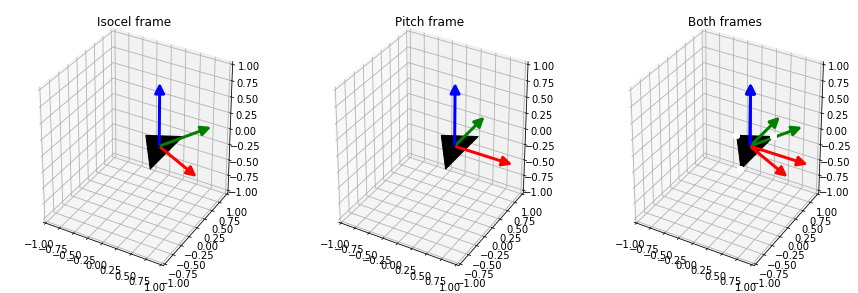

In [4]:
# To show the results of the Triangle
fig = plt.figure(figsize=(15, 5))
ax0 = fig.add_subplot(131, projection='3d')
ax1 = fig.add_subplot(132, projection='3d')
ax2 = fig.add_subplot(133, projection='3d')
for ax in [ax0,ax1,ax2]:
    mytriangle.plot(ax=ax, apex_marker='wo')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

draw_frame(ax=ax0, frame=isocel_frame)
ax0.set_title('Isocel frame')
draw_frame(ax=ax1, frame=pitch_frame)
ax1.set_title('Pitch frame')
draw_frame(ax=ax2, frame=isocel_frame)
draw_frame(ax=ax2, frame=pitch_frame)
ax2.set_title('Both frames')

### Yaw, pitch, and roll rotations
A rotation is a circular movement of an object around a center (or point) of rotation . A three-dimensional object always rotates around an imaginary line called a rotation axis. In three dimensions, the orientation of an object is given by three rotations, i.e. by three rotation axis. Several conventions exist for defining the rotations. Here we will talk only about the ZYX convention, also known as yaw, pitch, and roll rotations.


(from: http://planning.cs.uiuc.edu/node102.html)

A 3D body can be rotated about three orthogonal axes, as shown in Figure 3.8. Borrowing aviation terminology, these rotations will be referred to as yaw, pitch, and roll:


A yaw is a counterclockwise rotation of $\alpha$ about the $z$-axis. The rotation matrix is given by

$$ R_z(\alpha) = \begin{pmatrix}\cos\alpha & -\sin\alpha & 0 \\ \sin\alpha & \cos\alpha & 0 \\ 0 & 0 & 1  \end{pmatrix}$$

Note that the upper left entries of $R_z(\alpha)$ form a 2D rotation applied to the $x$ and $y$ coordinates, whereas the $z$ coordinate remains constant.

A pitch is a counterclockwise rotation of $\beta$ about the $y$-axis. The rotation matrix is given by

$$R_y(\beta) = \begin{pmatrix}\cos\beta & 0 & \sin\beta \\ 0 & 1 & 0 \\ -\sin\beta & 0 & \cos\beta  \end{pmatrix}$$


A roll is a counterclockwise rotation of $\gamma$ about the $x$-axis. The rotation matrix is given by

$$R_x(\gamma) = \begin{pmatrix}1 & 0 & 0 \\ 0 & \cos\gamma & -\sin\gamma \\ 0 & \sin\gamma & \cos\gamma  \end{pmatrix}$$

Each rotation matrix is a simple extension of the 2D rotation matrix, (3.31). For example, the yaw matrix,  $R_z(\alpha)$, essentially performs a 2D rotation with respect to the $x$ and $y$ coordinates while leaving the $z$ coordinate unchanged. Thus, the third row and third column of  $R_z(\alpha)$ look like part of the identity matrix, while the upper right portion of  $R_z(\alpha)$ looks like the 2D rotation matrix.
The yaw, pitch, and roll rotations can be used to place a 3D body in any orientation. A single rotation matrix can be formed by multiplying the yaw, pitch, and roll rotation matrices to obtain

$$
   \begin{split}
   R(\alpha,& \beta,\gamma) = R_z(\alpha) \, R_y(\beta) \, R_x(\gamma) = \\
   & \begin{pmatrix}
   \cos\alpha \cos\beta & 
   \cos\alpha \sin\beta \sin\gamma - \sin\alpha \cos\gamma &
   \cos\alpha \sin\beta \cos\gamma + \sin\alpha \sin\gamma \\
   \sin\alpha \cos\beta &
   \sin\alpha \sin\beta \sin\gamma + \cos\alpha \cos\gamma &
   \sin\alpha \sin\beta \cos\gamma - \cos\alpha \sin\gamma \\
   -\sin\beta & \cos\beta \sin\gamma & \cos\beta \cos\gamma \\
   \end{pmatrix}
   \end{split}
$$

It is important to note that  $R(\alpha,\beta,\gamma)$ performs the roll first, then the pitch, and finally the yaw. If the order of these operations is changed, a different rotation matrix would result. Be careful when interpreting the rotations. Consider the final rotation, a yaw by $\alpha$. Imagine sitting inside of a robot ${\cal A}$ that looks like an aircraft. If  $\beta = \gamma = 0$, then the yaw turns the plane in a way that feels like turning a car to the left. However, for arbitrary values of $\beta$ and $\gamma$, the final rotation axis will not be vertically aligned with the aircraft because the aircraft is left in an unusual orientation before $\alpha$ is applied. The yaw rotation occurs about the $z$-axis of the world frame, not the body frame of ${\cal A}$. Each time a new rotation matrix is introduced from the left, it has no concern for original body frame of ${\cal A}$. It simply rotates every point in  ${\mathbb{R}}^3$ in terms of the world frame. Note that 3D rotations depend on three parameters, $\alpha$, $\beta$, and $\gamma$, whereas 2D rotations depend only on a single parameter, $\theta $. The primitives of the model can be transformed using  $R(\alpha,\beta,\gamma)$, resulting in  ${\cal A}(\alpha,\beta,\gamma)$.

## Orientation matrix

When introducing the body frame, we talked about an imaginary rotation of the reference frame to the animal's head frame. This is equivalent to finding the matrix $R$ so that:

$$
   R.F^\text{ref} = F^\text{bee} \\
   F^\text{ref} = \begin{pmatrix}
   roll^\text{ref}_x & pitch^\text{ref}_x & yaw^\text{ref}_z \\
   roll^\text{ref}_y & pitch^\text{ref}_y & yaw^\text{ref}_y \\
   roll^\text{ref}_z & pitch^\text{ref}_z & yaw^\text{ref}_z \\
   \end{pmatrix}
$$

The linear algebra tells us that if the inverse of $F^\text{ref}$ exists; the rotation matrix $R$is equal to $F^\text{bee}.\left(F^\text{ref}\right)^{-1}$

The rotation matrix $R$ has nine values, but we know that only three angles are necessary to know the orientation of the rigid body. So how can we have the yaw, pitch, and roll angles from the rotation matrix $R$?

## Determining yaw, pitch, and roll from a rotation matrix
(adapted from http://planning.cs.uiuc.edu/node103.html)

It is often convenient to determine the $\alpha$, $\beta$, and $\gamma$ parameters directly from a given rotation matrix. Suppose an arbitrary rotation matrix

$$\begin{pmatrix}r_{11} & r_{12} & r_{13}\\ r_{21} & r_{22} & r_{23}\\  r_{31} & r_{32} & r_{33}  \end{pmatrix}$$

is given. By setting each entry equal to its corresponding entry in (3.42), equations are obtained that must be solved for $\alpha$, $\beta$, and $\gamma$. Note that  $r_{21}/r_{11} = \tan\alpha$ and  $r_{32}/r_{33} = \tan \gamma$. Also,  $r_{31} = - \sin\beta$ and  $\pm\sqrt{r^2_{32}+r^2_{33}} = \cos\beta$. Solving for each angle yields

$$\displaystyle \alpha = \tan^{-1} (\pm r_{21}/\pm r_{11})$$

$$\beta = \tan^{-1} \Big(-r_{31} \big/ \pm\sqrt{r^2_{32}+r^2_{33}}\Big)$$

$$\gamma = \tan^{-1} (\pm r_{32}/\pm r_{33})$$
 
Note that the ambiguity on $\pm$come from the sign of $\cos\beta$, which is a priori unknown. 

There is a choice of four quadrants for the inverse tangent functions. How can the correct quadrant be determined? Each quadrant should be chosen by using the signs of the numerator and denominator of the argument. The numerator sign selects whether the direction will be above or below the $x$ -axis, and the denominator selects whether the direction will be to the left or right of the $y$ -axis. This is the same as the $\arctan_2$ function in the C programming language, which nicely expands the range of the arctangent to $[0,2
\pi)$. This can be applied to express (3.44), (3.45), and (3.46) as

$$\alpha = \arctan_2(\pm r_{21},\pm r_{11})$$

$$\beta = \arctan_2\Big(-r_{31},\pm\sqrt{r^2_{32}+r^2_{33}}\Big)$$

$$\gamma = \arctan_2(\pm  r_{32},\pm  r_{33})$$

Note that this method assumes  $r_{11} \not = 0$ and  $r_{33} \not = 0$.

Note that the choice of $\pm$ can be determined by comparing the estimated orientation matrix from $\alpha$,$\beta$, and $\gamma$ and the orientation matrix of the agent.

In [5]:
from navipy.maths.homogeneous_transformations import compose_matrix, \
    decompose_matrix
import copy

triangle_orig = copy.copy(mytriangle)
frame_orig = copy.copy(pitch_frame)
triangle = copy.copy(mytriangle)

Let's say we have the triangle `mytriangle` which is placed and orientated as follow:

In [6]:
pos = np.array([1.0, 1.0, 1.0])
yaw = +1*np.pi/3
pitch = +1*np.pi/6
roll = -1*np.pi/6

We need to tell navipy which of the 24 Euler's convention to use.

The Yaw-pitch-roll convention in navipy is:

In [7]:
axes = 'rzyx'

The homogeneous transformation, i.e. the position-orientation matrix can then be obtained

In [8]:
# The position-orientation orientation is given by
transform = compose_matrix(translate=pos,
                           angles=[yaw, pitch, roll],
                           axes=axes)

and the triangle placed and orientated appropriatly

In [9]:
#We can now place the triangle at the position and orientation
triangle.transform(transform)

**note** that the transformed triangle would be usually the one we observed, as the insect already have a given position and orientation

If we had only measured the transformed triangle, we would like to know it's position and orientation in space
to obtain the position and orientaiton of the insect.

The decomposition is done in two steps:
1. get the frame of the triangle
2. decompose into euler angles and position, i.e. the translation required to reach the insect position from the center of the arena


In [10]:
frame = triangle2homogeous_transform(
    triangle, triangle_mode='y-axis=1-2')
_, _, angles, translate, _ = decompose_matrix(frame, axes=axes)

Let's plot the results, and check if the angles and translation have been correctly determined (in this abstract example, we know the position orientation of the triangle. In a real situation, this check can not be done.)

/home/bolirev/.virtualenvs/toolbox-navigation/lib/python3.6/site-packages/matplotlib-2.2.2-py3.6-linux-x86_64.egg/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


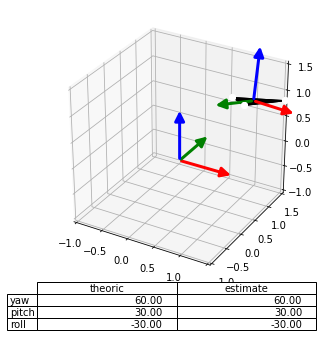

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
draw_frame(ax=ax, frame=frame_orig)
triangle_orig.plot(ax=ax, apex_marker='wo')
draw_frame(ax=ax, frame=frame)
triangle.plot(ax=ax, apex_marker='wo')

celltext = [['{:0.2f}'.format(np.rad2deg(yaw)),
             '{:0.2f}'.format(np.rad2deg(angles[0]))],
            ['{:0.2f}'.format(np.rad2deg(pitch)),
             '{:0.2f}'.format(np.rad2deg(angles[1]))],
            ['{:0.2f}'.format(np.rad2deg(roll)),
             '{:0.2f}'.format(np.rad2deg(angles[2]))]]
ax.table(cellText=celltext,
         rowLabels=['yaw', 'pitch', 'roll'],
         colLabels=['theoric', 'estimate'],
         loc='bottom')

ax.set_xlim([-1, 1.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 1.5])
fig.show()


### Axis convention for aircraft

The local reference frames is composed of three axis.

* X axis is the longitudinal axis pointing ahead
* Z axis is the vertical axis pointing downwards
* Y axis is the lateral one, pointing in such a way that the frame is right handed (from left to right when looking ahead)